In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

dataset = pd.read_csv("../data/logfile-network-v5.csv", delimiter=";")
dataset.head()

,datacenter_id,datacenter_name,id,type,role,level,bandwidth,total_used_bandwidth,traffic_history,ports,duration,active_duration,power_per_port,low_power,high_power,is_active,Unnamed: 16
0,0,Datacenter_1,0,switch,access switch,0,360000,2427.0,162.0:93.0:71.0:72.0:79.0:73.0:71.0:71.0:73.0:...,"400,True,0.24269999999999994,12,0,10000,2427.0...",3.6094,0.006742,8,132,132,True,NaN
1,0,Datacenter_1,1,switch,access switch,0,360000,3573.0,89.0:89.0:95.0:198.0:218.0:156.0:90.0:109.0:17...,"402,True,0.35729999999999995,12,1,10000,3573.0...",3.6094,0.009925,8,132,132,True,NaN
2,0,Datacenter_1,2,switch,access switch,0,360000,2492.0,94.0:68.0:73.0:61.0:73.0:83.0:74.0:63.0:73.0:7...,"404,True,0.24919999999999998,12,2,10000,2492.0...",3.6094,0.006922,8,132,132,True,NaN
3,0,Datacenter_1,3,switch,access switch,0,360000,2335.0,64.0:64.0:64.0:73.0:74.0:64.0:74.0:74.0:56.0:6...,"406,True,0.23349999999999999,12,3,10000,2335.0...",3.6094,0.006486,8,132,132,True,NaN
4,0,Datacenter_1,4,switch,access switch,0,360000,2436.0,70.0:64.0:57.0:75.0:72.0:65.0:75.0:66.0:63.0:7...,"408,True,0.24359999999999996,12,4,10000,2436.0...",3.6094,0.006767,8,132,132,True,NaN


#### Access switches

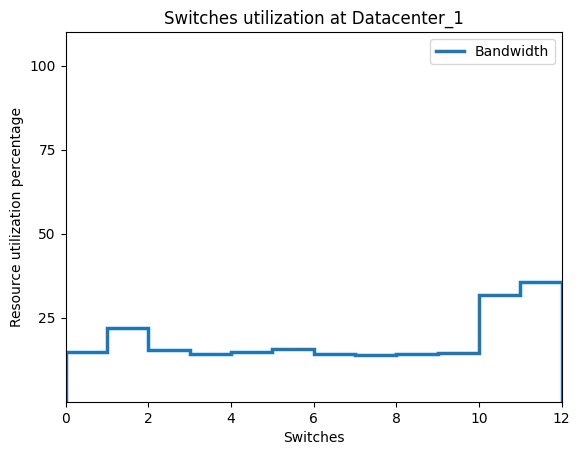

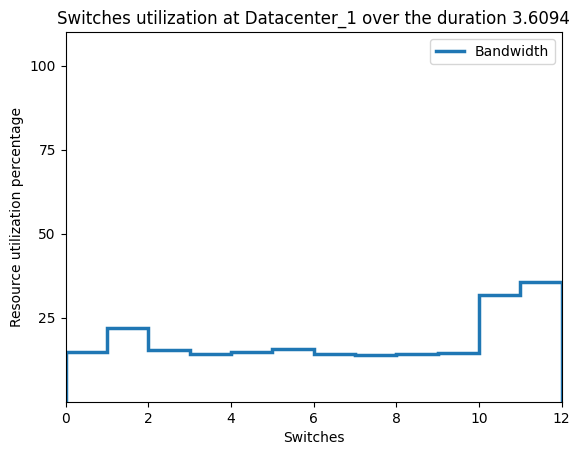

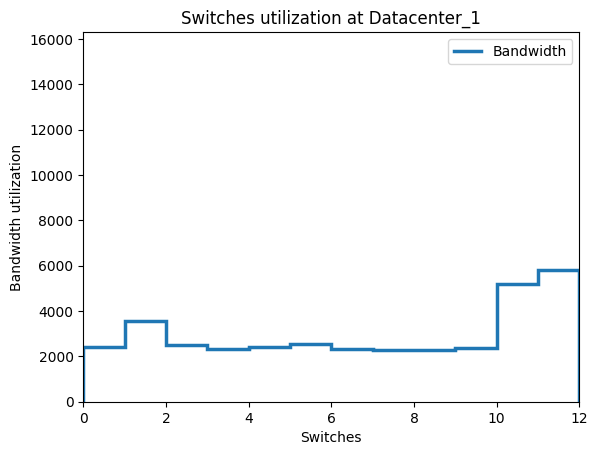

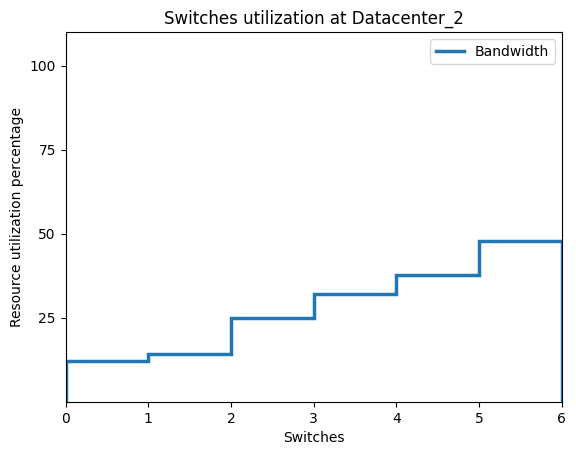

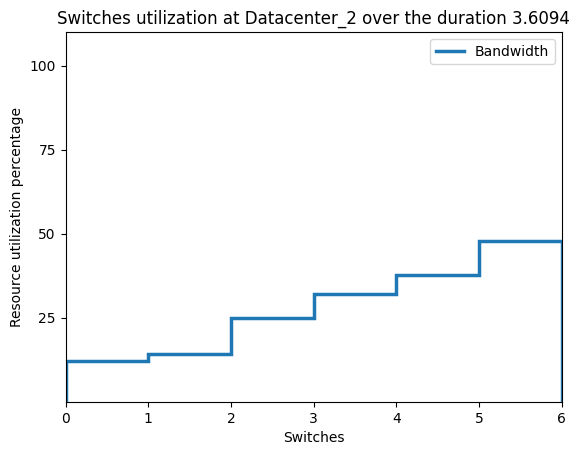

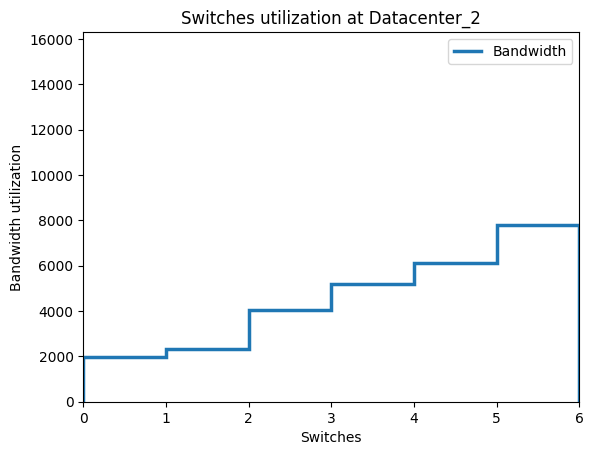

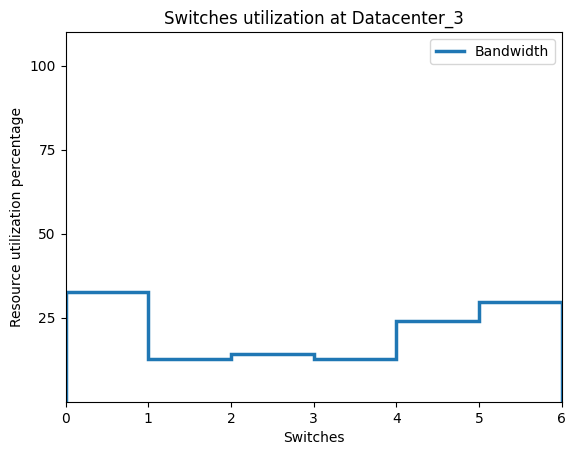

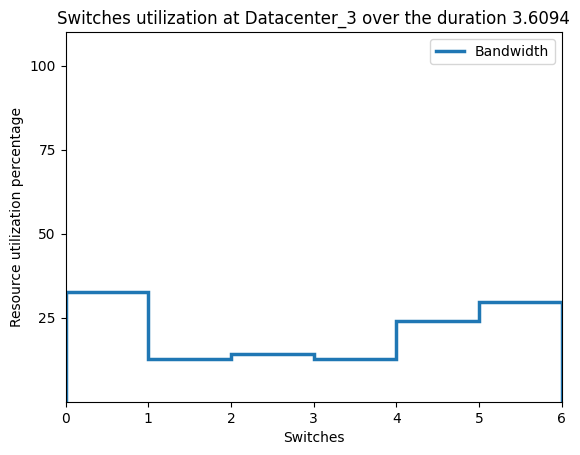

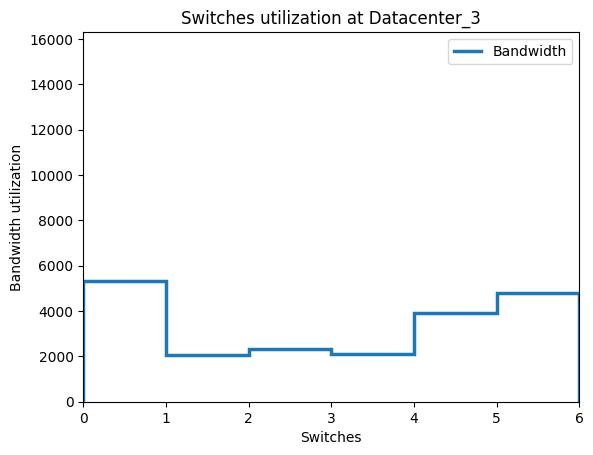

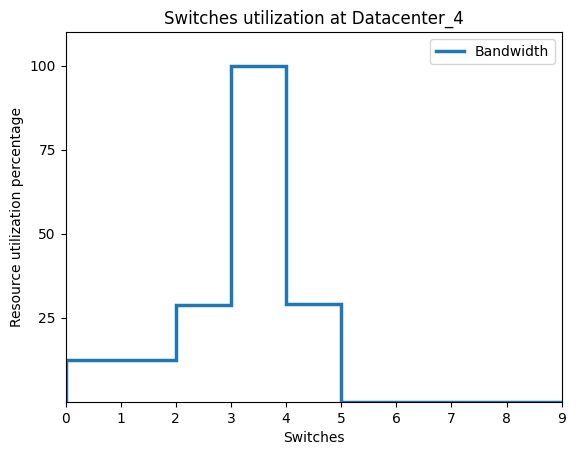

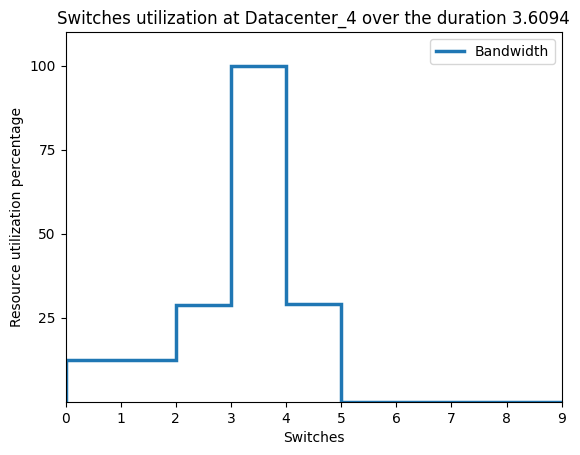

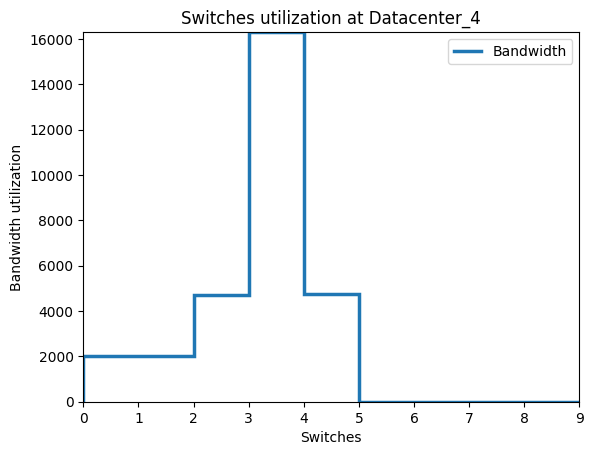

In [2]:
labels = np.unique(dataset['datacenter_name'])
max_switch_bandwidth_utilization = max(dataset[dataset['role'] == "access switch"]['total_used_bandwidth'])
for i in range(len(labels)):
    # max_switch_bandwidth_utilization = max(dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['role'] == "access switch")]['total_used_bandwidth'])
    switch_bandwidth_utilization = np.array([])
    # switch_active_duration = np.array([])
    # switch_inactive_duration = np.array([])
    for index, sample in dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['role'] == "access switch")].iterrows():
        switch_bandwidth_utilization = np.append(switch_bandwidth_utilization, sample['total_used_bandwidth'])
    
    fig, ax = plt.subplots()
    ax.stairs(((switch_bandwidth_utilization * dataset['duration'][0])/(max_switch_bandwidth_utilization * dataset['duration'][0])) * 100, linewidth=2.5, label="Bandwidth")
    ax.set(xlim=(0, len(switch_bandwidth_utilization)), ylim=(0,110), yticks=np.array([25,50,75,100]))
    plt.ylabel("Resource utilization percentage")
    plt.xlabel("Switches")
    plt.title(f"Switches utilization at {sample['datacenter_name']}")
    plt.legend()
    plt.show()
    
    fig, ax = plt.subplots()
    ax.stairs((switch_bandwidth_utilization/max_switch_bandwidth_utilization)*100, linewidth=2.5, label="Bandwidth")
    ax.set(xlim=(0, len(switch_bandwidth_utilization)), ylim=(0,110), yticks=np.array([25,50,75,100]))
    plt.ylabel("Resource utilization percentage")
    plt.xlabel("Switches")
    plt.title(f"Switches utilization at {sample['datacenter_name']} over the duration {dataset['duration'][0]}")
    plt.legend()
    plt.show()
    
    fig, ax = plt.subplots()
    ax.stairs(switch_bandwidth_utilization, linewidth=2.5, label="Bandwidth")
    ax.set(xlim=(0, len(switch_bandwidth_utilization)), ylim=(0,max_switch_bandwidth_utilization + 10))
    plt.ylabel("Bandwidth utilization")
    plt.xlabel("Switches")
    plt.title(f"Switches utilization at {sample['datacenter_name']}")
    plt.legend()
    plt.show()

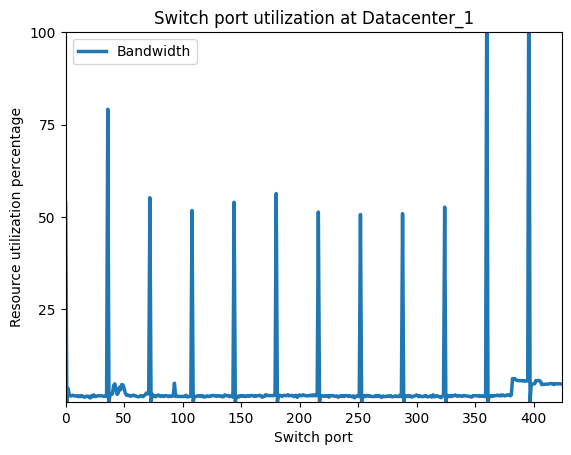

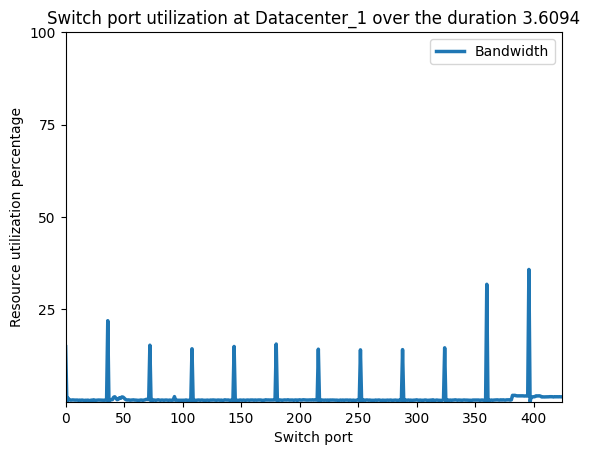

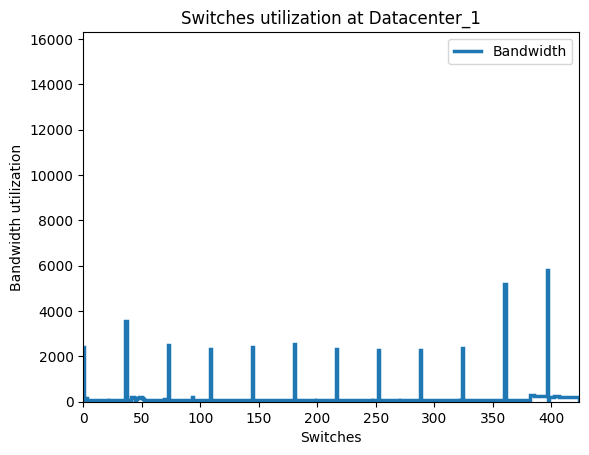

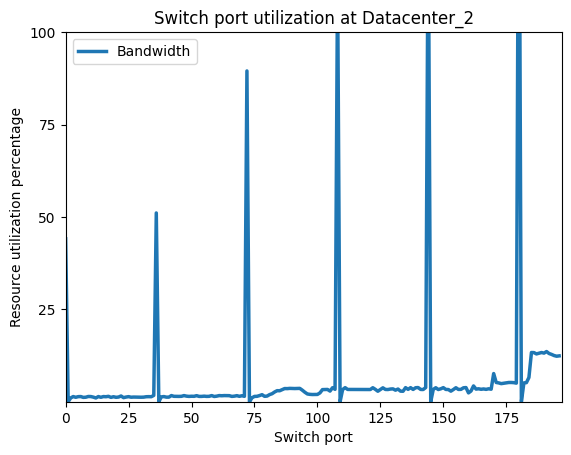

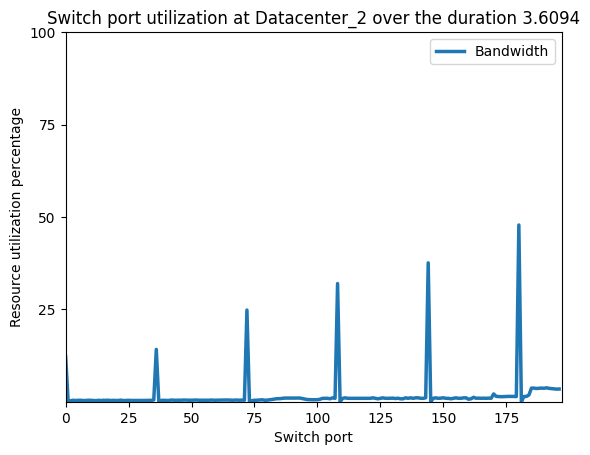

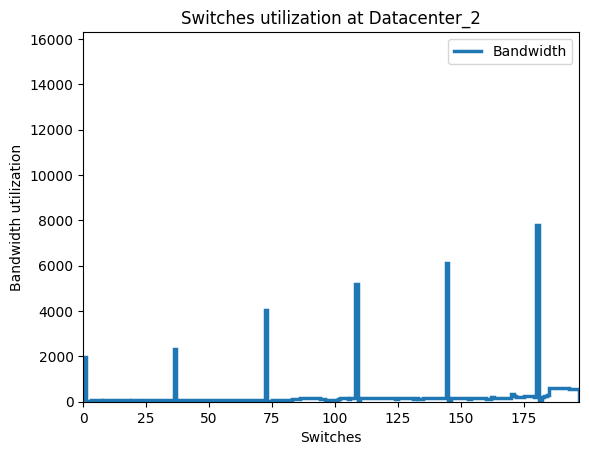

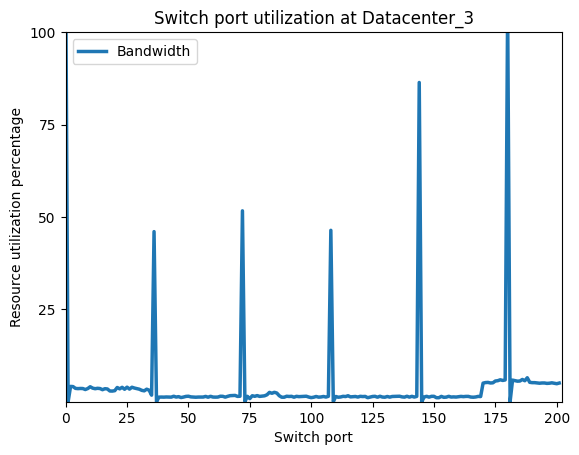

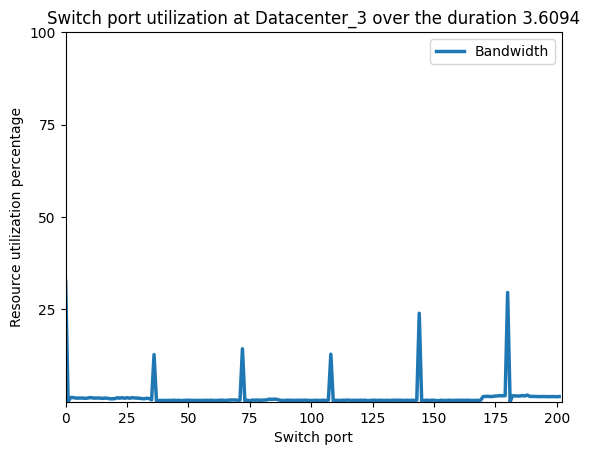

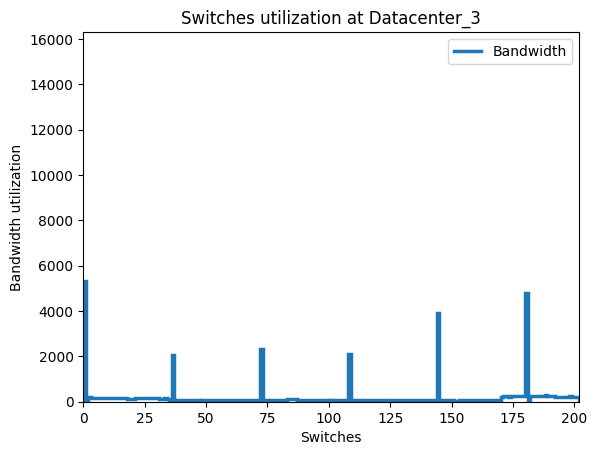

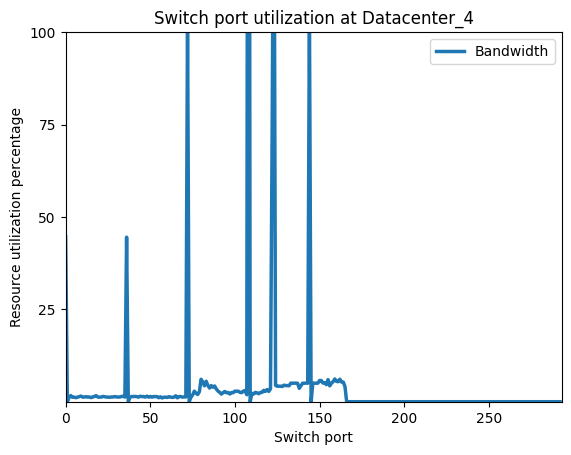

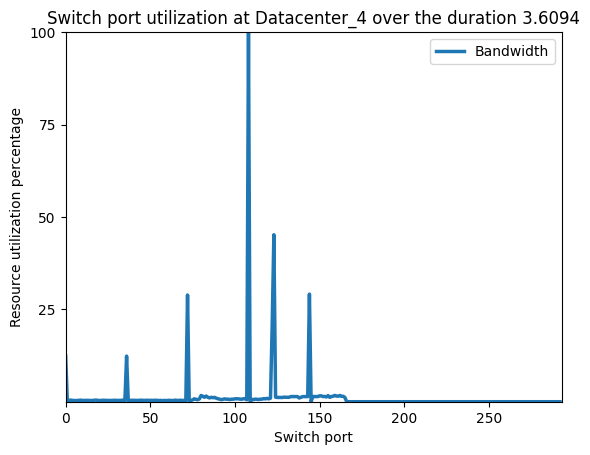

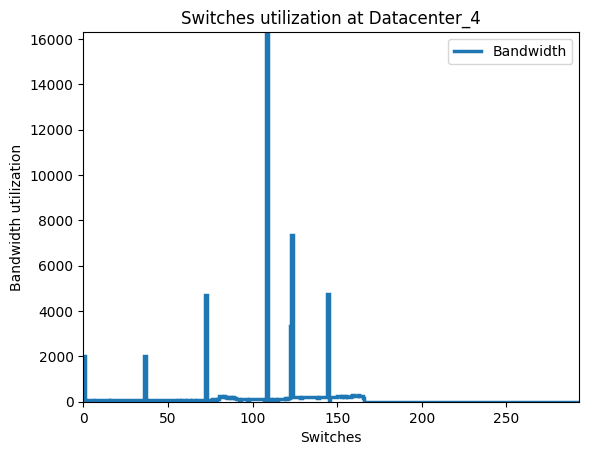

In [3]:
labels = np.unique(dataset['datacenter_name'])
max_switch_port_bandwidth_utilization = 0
for index, sample in dataset[dataset['role'] == "access switch"].iterrows():
    if pd.notna(sample['ports']):
        ports = sample['ports'].split(":") # ports: id, is_active, active_duration, switch_id, host_id, bandwidth, total_used_bandwidth
        for port in ports:
            if port != "":
                port_info = port.split(",")
                if max_switch_port_bandwidth_utilization < float(port_info[6]):
                    max_switch_port_bandwidth_utilization = float(port_info[6])

for i in range(len(labels)):
    switch_port_bandwidth_utilization = np.array([])
    # switch_active_duration = np.array([])
    # switch_inactive_duration = np.array([])
    for index, sample in dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['role'] == "access switch")].iterrows():
        if pd.notna(sample['ports']):
            ports = sample['ports'].split(":")
            for port in ports:
                if port != "":
                    port_info = port.split(",")
                    switch_port_bandwidth_utilization = np.append(switch_port_bandwidth_utilization, float(port_info[6]))
    
    fig, ax = plt.subplots()
    ax.plot(((switch_port_bandwidth_utilization / max_switch_port_bandwidth_utilization) * dataset['duration'][0]) * 100, linewidth=2.5, label="Bandwidth")
    ax.set(xlim=(0, len(switch_port_bandwidth_utilization)), ylim=(0,100), yticks=np.array([25,50,75,100]))
    plt.ylabel("Resource utilization percentage")
    plt.xlabel("Switch port")
    plt.title(f"Switch port utilization at {sample['datacenter_name']}")
    plt.legend()
    plt.show()
    
    fig, ax = plt.subplots()
    ax.plot((switch_port_bandwidth_utilization/max_switch_port_bandwidth_utilization)*100, linewidth=2.5, label="Bandwidth")
    ax.set(xlim=(0, len(switch_port_bandwidth_utilization)), ylim=(0,100), yticks=np.array([25,50,75,100]))
    plt.ylabel("Resource utilization percentage")
    plt.xlabel("Switch port")
    plt.title(f"Switch port utilization at {sample['datacenter_name']} over the duration {dataset['duration'][0]}")
    plt.legend()
    plt.show()
    
    fig, ax = plt.subplots()
    ax.stairs(switch_port_bandwidth_utilization, linewidth=2.5, label="Bandwidth")
    ax.set(xlim=(0, len(switch_port_bandwidth_utilization)), ylim=(0,max_switch_port_bandwidth_utilization + 10))
    plt.ylabel("Bandwidth utilization")
    plt.xlabel("Switches")
    plt.title(f"Switches utilization at {sample['datacenter_name']}")
    plt.legend()
    plt.show()

#### Distribution switches

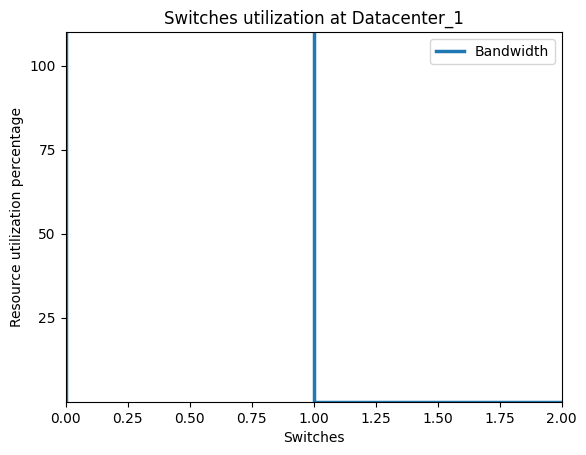

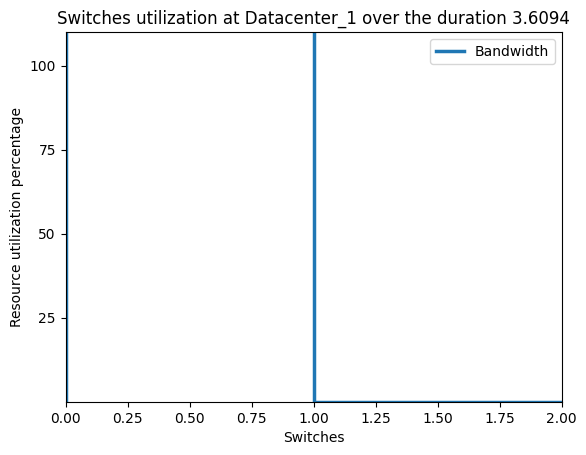

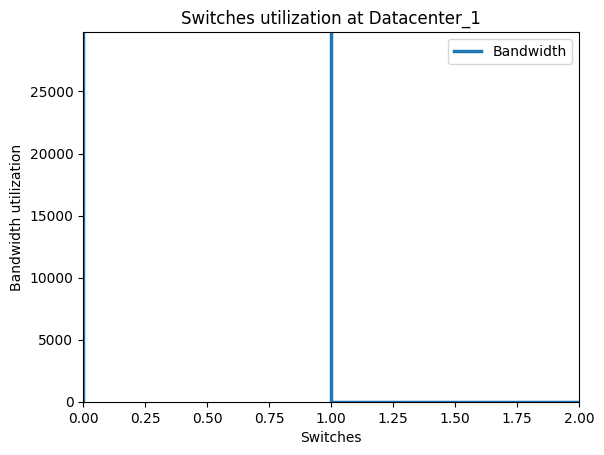

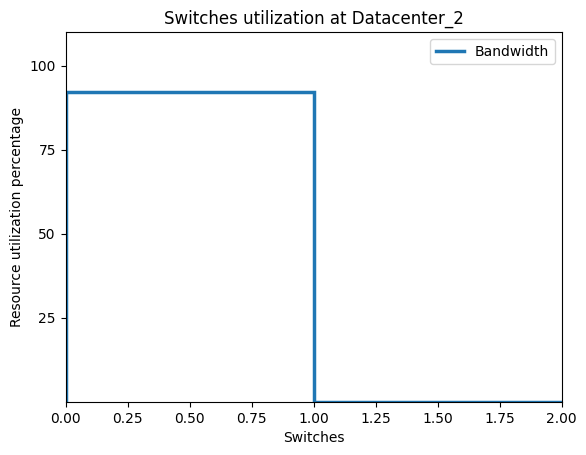

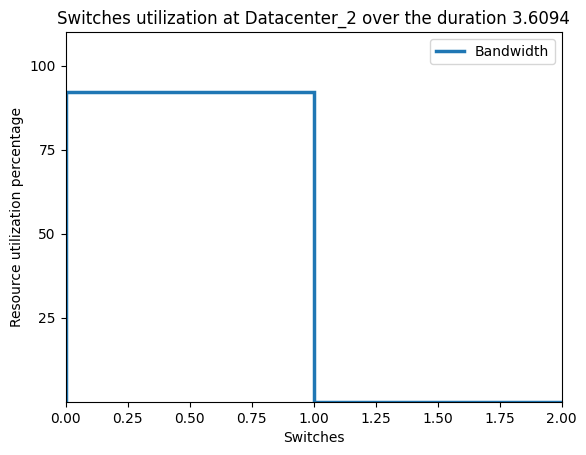

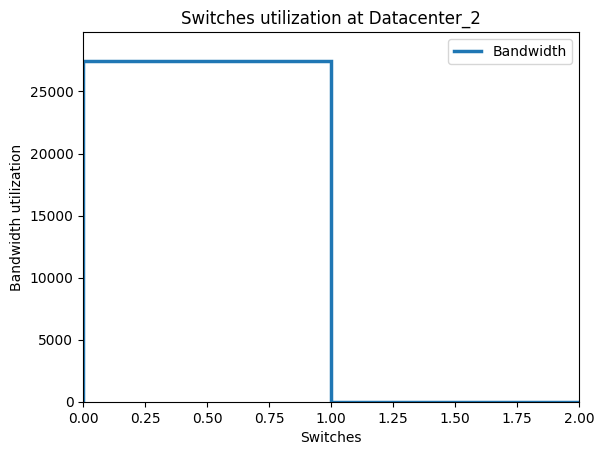

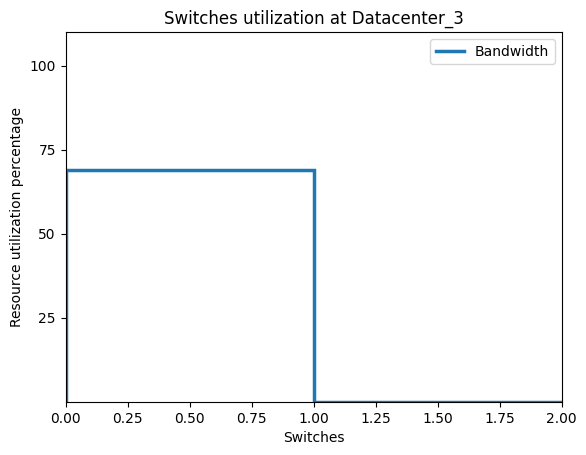

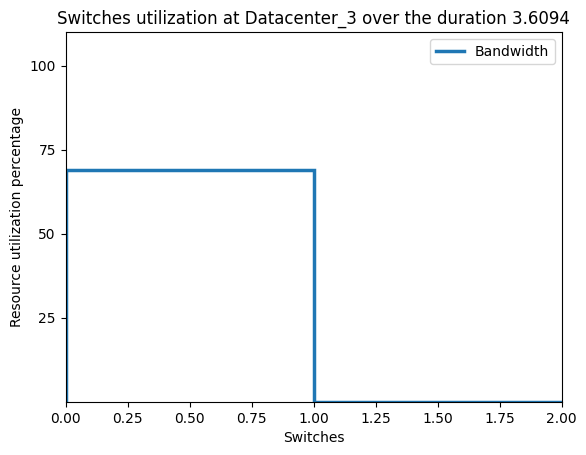

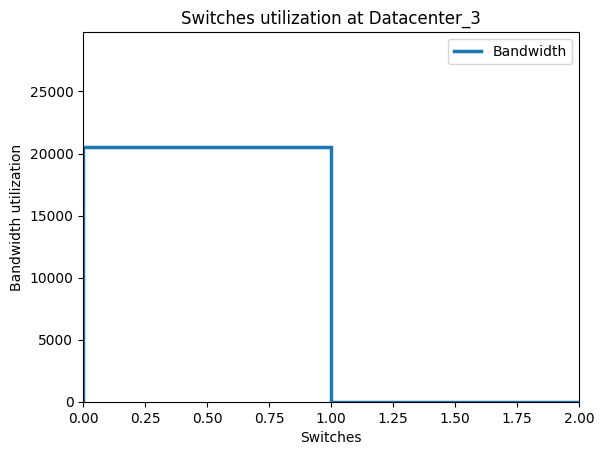

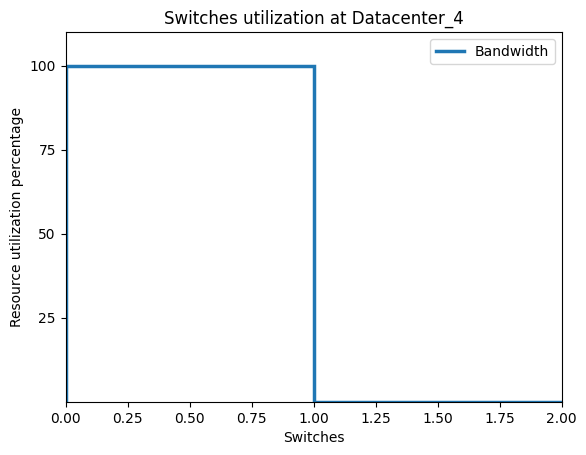

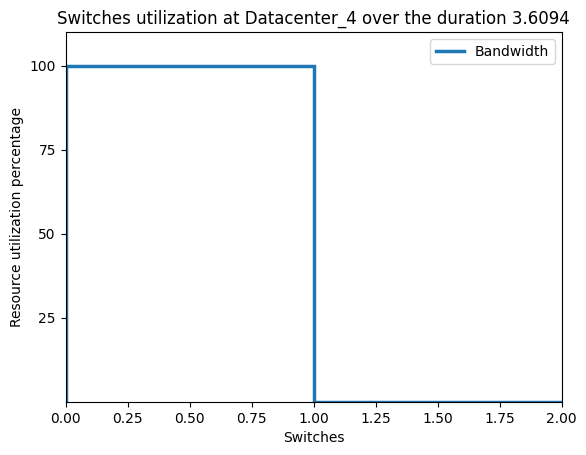

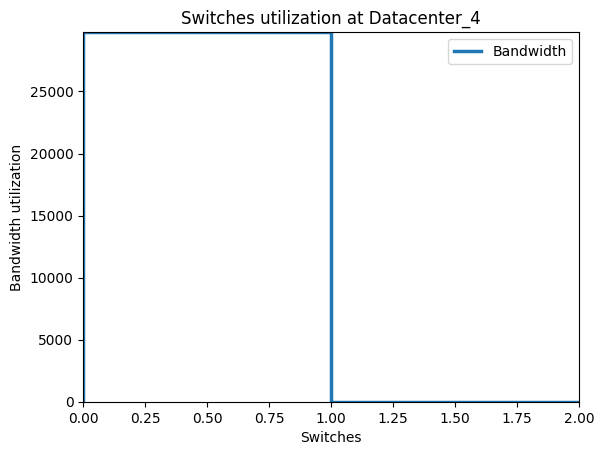

In [4]:
labels = np.unique(dataset['datacenter_name'])
max_switch_bandwidth_utilization = max(dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['role'] == "distribution switch")]['total_used_bandwidth'])
for i in range(len(labels)):
    switch_bandwidth_utilization = np.array([])
    # switch_active_duration = np.array([])
    # switch_inactive_duration = np.array([])
    for index, sample in dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['role'] == "distribution switch")].iterrows():
        switch_bandwidth_utilization = np.append(switch_bandwidth_utilization, sample['total_used_bandwidth'])
    
    fig, ax = plt.subplots()
    ax.stairs(((switch_bandwidth_utilization * dataset['duration'][0])/(max_switch_bandwidth_utilization * dataset['duration'][0])) * 100, linewidth=2.5, label="Bandwidth")
    ax.set(xlim=(0, len(switch_bandwidth_utilization)), ylim=(0,110), yticks=np.array([25,50,75,100]))
    plt.ylabel("Resource utilization percentage")
    plt.xlabel("Switches")
    plt.title(f"Switches utilization at {sample['datacenter_name']}")
    plt.legend()
    plt.show()
    
    fig, ax = plt.subplots()
    ax.stairs((switch_bandwidth_utilization/max_switch_bandwidth_utilization)*100, linewidth=2.5, label="Bandwidth")
    ax.set(xlim=(0, len(switch_bandwidth_utilization)), ylim=(0,110), yticks=np.array([25,50,75,100]))
    plt.ylabel("Resource utilization percentage")
    plt.xlabel("Switches")
    plt.title(f"Switches utilization at {sample['datacenter_name']} over the duration {dataset['duration'][0]}")
    plt.legend()
    plt.show()
    
    fig, ax = plt.subplots()
    ax.stairs(switch_bandwidth_utilization, linewidth=2.5, label="Bandwidth")
    ax.set(xlim=(0, len(switch_bandwidth_utilization)), ylim=(0,max_switch_bandwidth_utilization + 10))
    plt.ylabel("Bandwidth utilization")
    plt.xlabel("Switches")
    plt.title(f"Switches utilization at {sample['datacenter_name']}")
    plt.legend()
    plt.show()

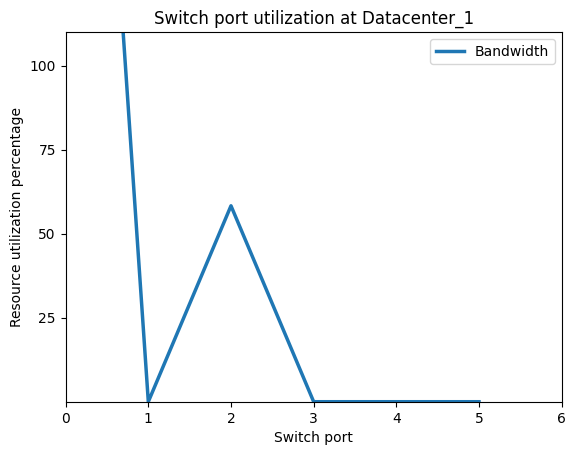

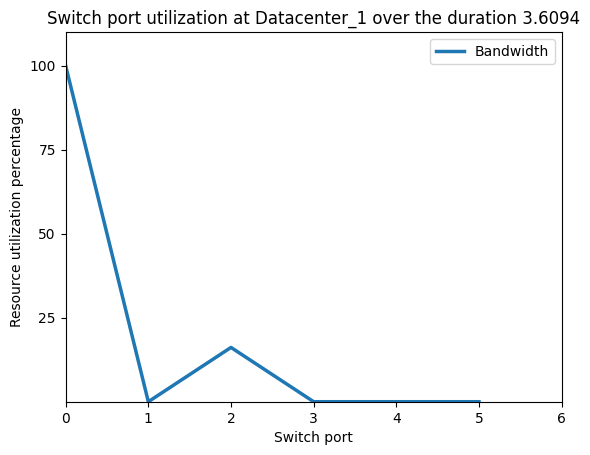

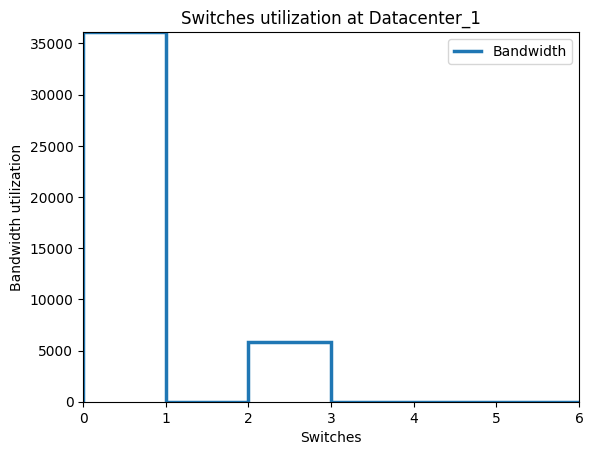

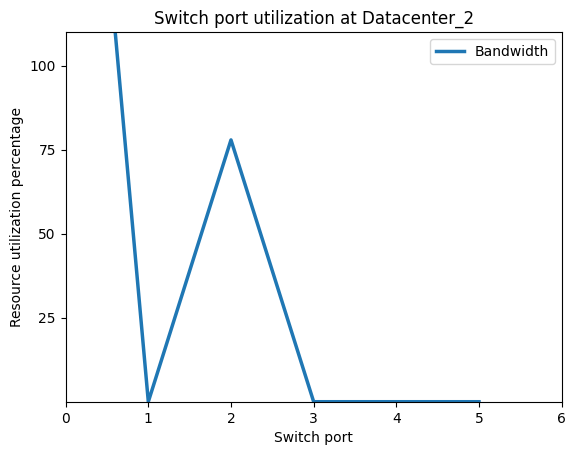

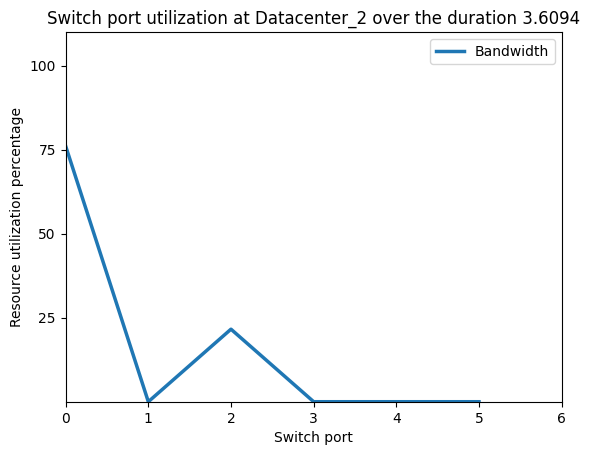

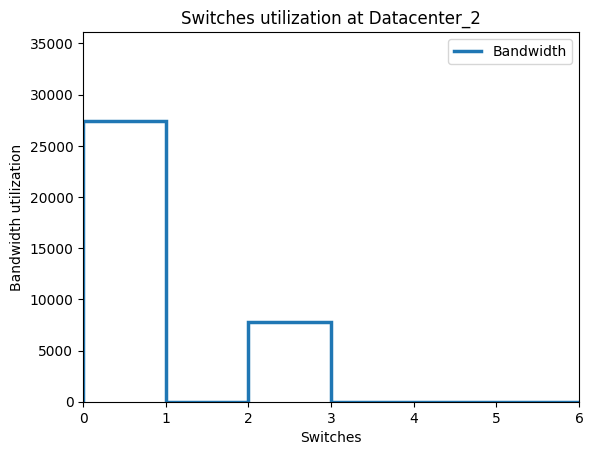

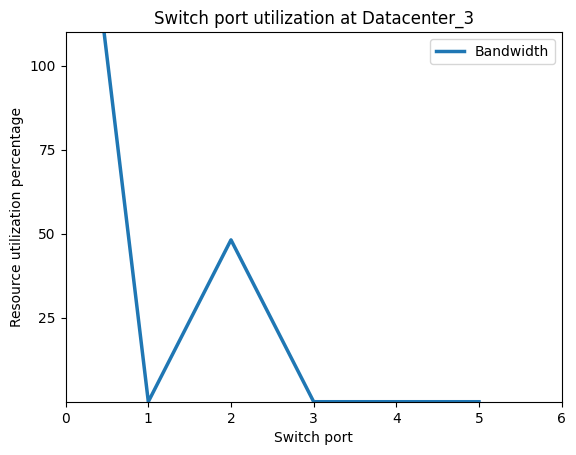

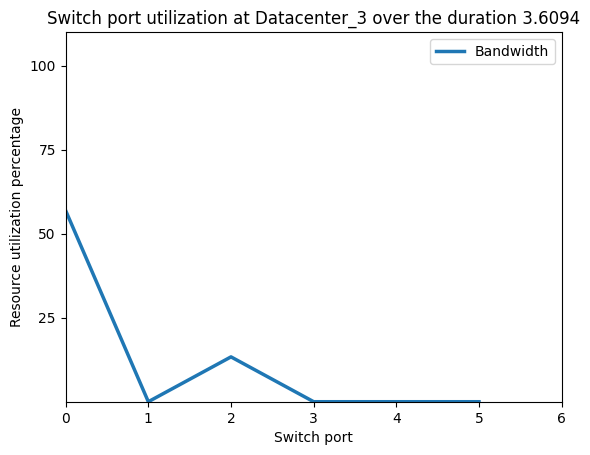

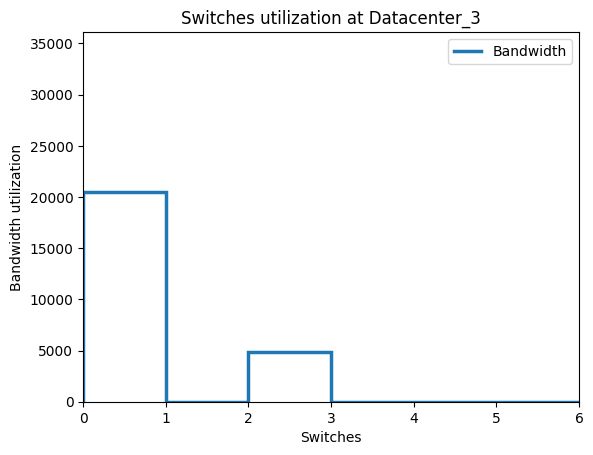

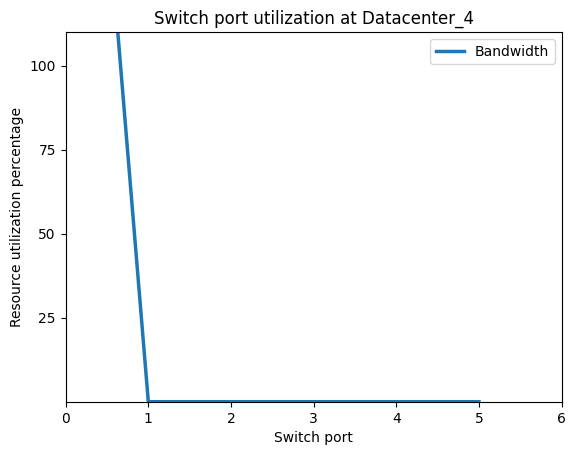

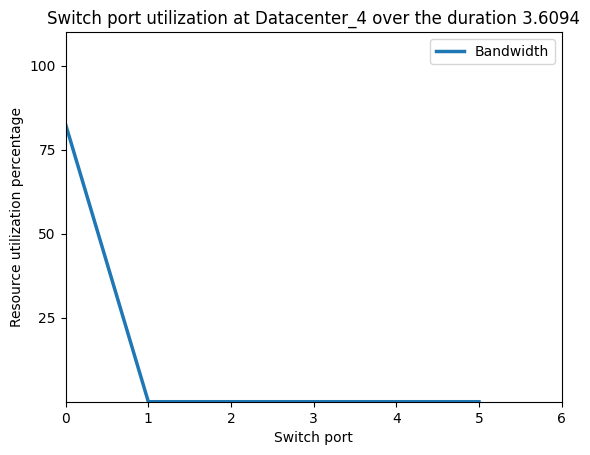

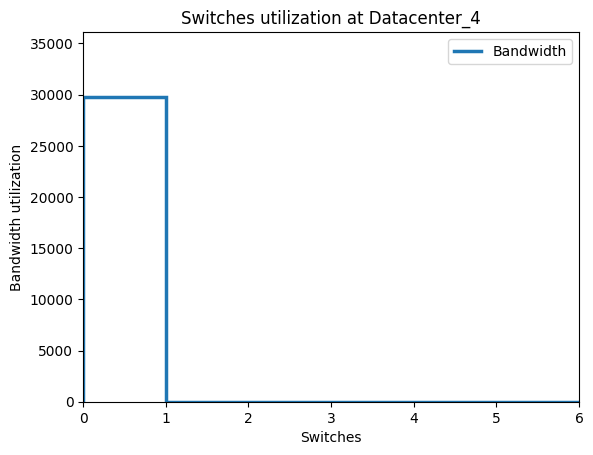

In [5]:
labels = np.unique(dataset['datacenter_name'])
max_switch_port_bandwidth_utilization = 0
for index, sample in dataset[dataset['role'] == "distribution switch"].iterrows():
    if pd.notna(sample['ports']):
        ports = sample['ports'].split(":") # ports: id, is_active, active_duration, switch_id, host_id, bandwidth, total_used_bandwidth
        for port in ports:
            if port != "":
                port_info = port.split(",")
                if max_switch_port_bandwidth_utilization < float(port_info[6]):
                    max_switch_port_bandwidth_utilization = float(port_info[6])

for i in range(len(labels)):
    switch_port_bandwidth_utilization = np.array([])
    # switch_active_duration = np.array([])
    # switch_inactive_duration = np.array([])
    for index, sample in dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['role'] == "distribution switch")].iterrows():
        if pd.notna(sample['ports']):
            ports = sample['ports'].split(":")
            for port in ports:
                if port != "":
                    port_info = port.split(",")
                    switch_port_bandwidth_utilization = np.append(switch_port_bandwidth_utilization, float(port_info[6]))
    
    fig, ax = plt.subplots()
    ax.plot(((switch_port_bandwidth_utilization / max_switch_port_bandwidth_utilization) * dataset['duration'][0]) * 100, linewidth=2.5, label="Bandwidth")
    ax.set(xlim=(0, len(switch_port_bandwidth_utilization)), ylim=(0,110), yticks=np.array([25,50,75,100]))
    plt.ylabel("Resource utilization percentage")
    plt.xlabel("Switch port")
    plt.title(f"Switch port utilization at {sample['datacenter_name']}")
    plt.legend()
    plt.show()
    
    fig, ax = plt.subplots()
    ax.plot((switch_port_bandwidth_utilization/max_switch_port_bandwidth_utilization)*100, linewidth=2.5, label="Bandwidth")
    ax.set(xlim=(0, len(switch_port_bandwidth_utilization)), ylim=(0,110), yticks=np.array([25,50,75,100]))
    plt.ylabel("Resource utilization percentage")
    plt.xlabel("Switch port")
    plt.title(f"Switch port utilization at {sample['datacenter_name']} over the duration {dataset['duration'][0]}")
    plt.legend()
    plt.show()
    
    fig, ax = plt.subplots()
    ax.stairs(switch_port_bandwidth_utilization, linewidth=2.5, label="Bandwidth")
    ax.set(xlim=(0, len(switch_port_bandwidth_utilization)), ylim=(0,max_switch_port_bandwidth_utilization + 10))
    plt.ylabel("Bandwidth utilization")
    plt.xlabel("Switches")
    plt.title(f"Switches utilization at {sample['datacenter_name']}")
    plt.legend()
    plt.show()

#### Core switches

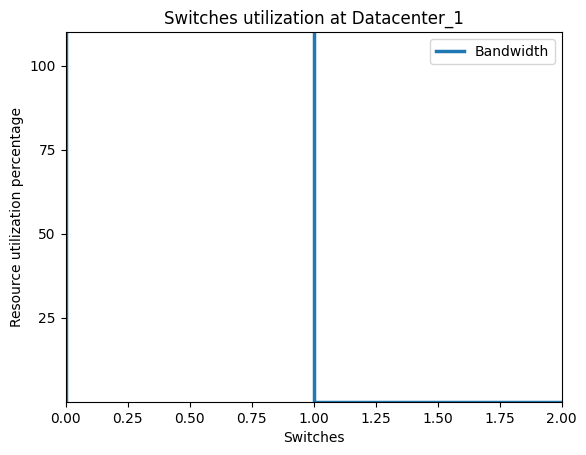

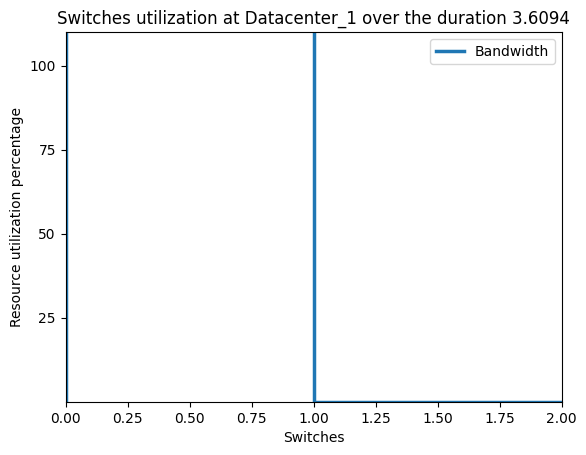

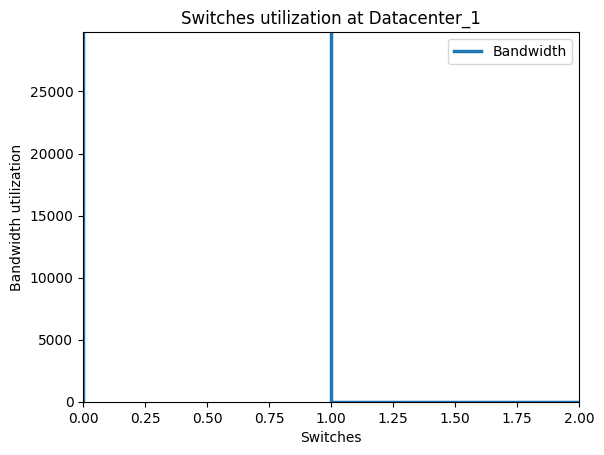

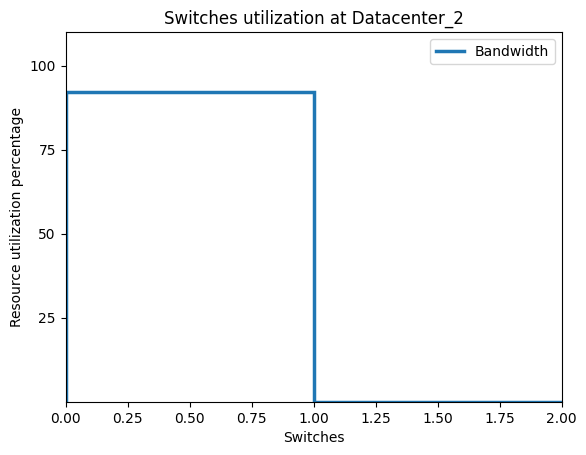

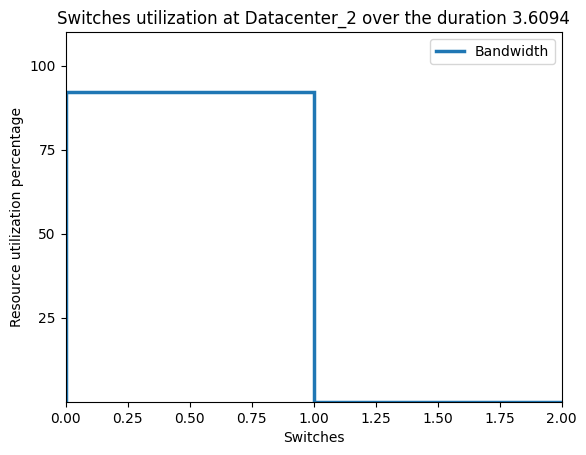

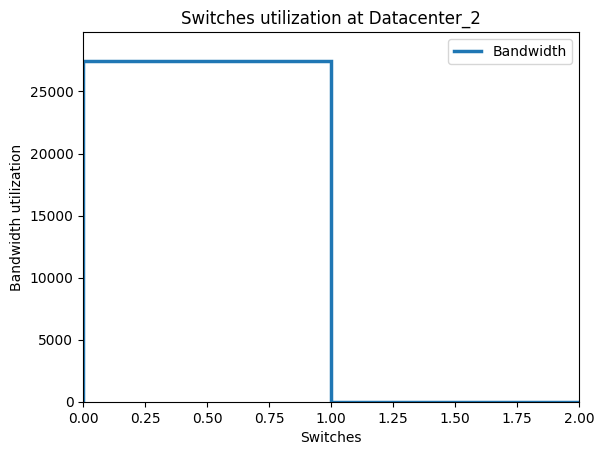

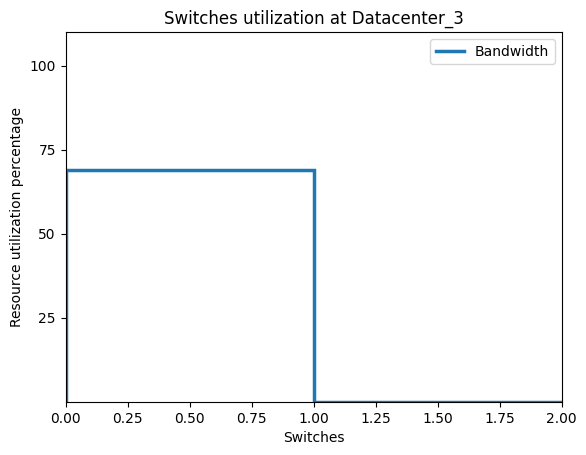

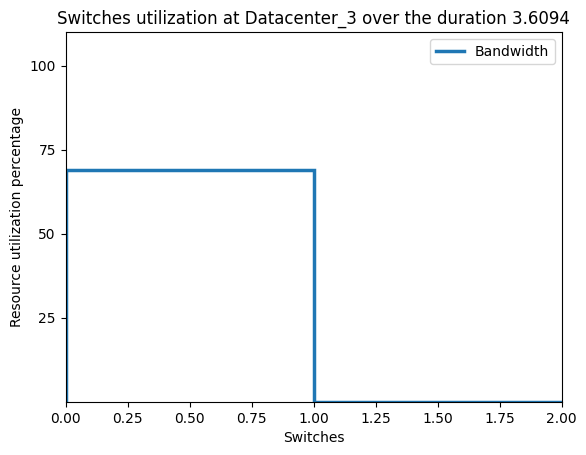

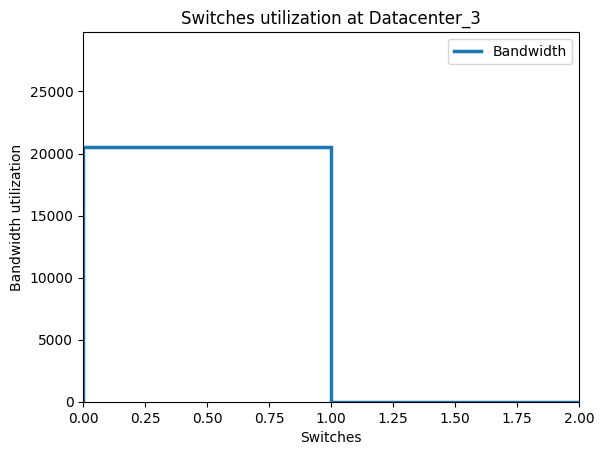

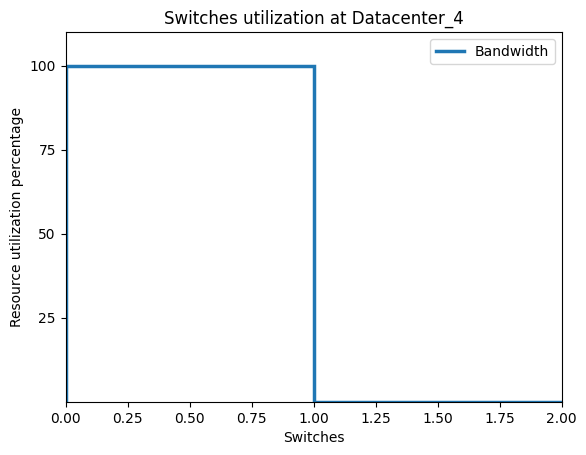

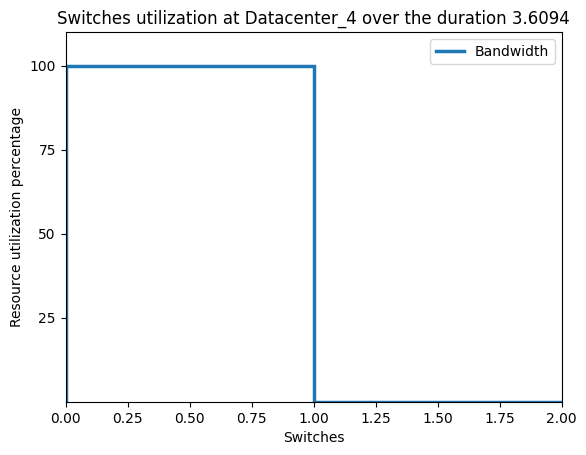

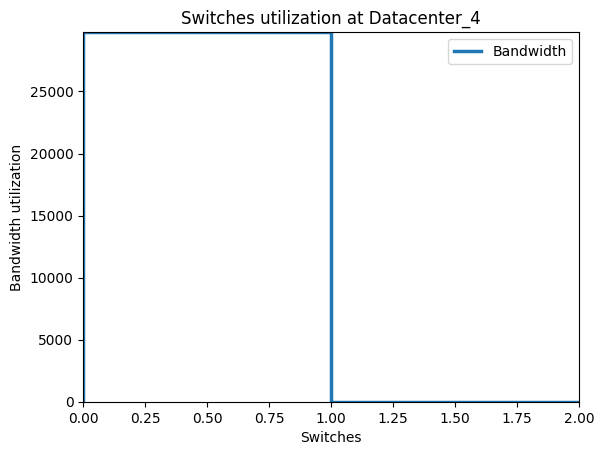

In [6]:
labels = np.unique(dataset['datacenter_name'])
max_switch_bandwidth_utilization = max(dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['role'] == "core switch")]['total_used_bandwidth'])
for i in range(len(labels)):
    switch_bandwidth_utilization = np.array([])
    # switch_active_duration = np.array([])
    # switch_inactive_duration = np.array([])
    for index, sample in dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['role'] == "core switch")].iterrows():
        switch_bandwidth_utilization = np.append(switch_bandwidth_utilization, sample['total_used_bandwidth'])
    
    fig, ax = plt.subplots()
    ax.stairs(((switch_bandwidth_utilization * dataset['duration'][0])/(max_switch_bandwidth_utilization * dataset['duration'][0])) * 100, linewidth=2.5, label="Bandwidth")
    ax.set(xlim=(0, len(switch_bandwidth_utilization)), ylim=(0,110), yticks=np.array([25,50,75,100]))
    plt.ylabel("Resource utilization percentage")
    plt.xlabel("Switches")
    plt.title(f"Switches utilization at {sample['datacenter_name']}")
    plt.legend()
    plt.show()
    
    fig, ax = plt.subplots()
    ax.stairs((switch_bandwidth_utilization/max_switch_bandwidth_utilization)*100, linewidth=2.5, label="Bandwidth")
    ax.set(xlim=(0, len(switch_bandwidth_utilization)), ylim=(0,110), yticks=np.array([25,50,75,100]))
    plt.ylabel("Resource utilization percentage")
    plt.xlabel("Switches")
    plt.title(f"Switches utilization at {sample['datacenter_name']} over the duration {dataset['duration'][0]}")
    plt.legend()
    plt.show()
    
    fig, ax = plt.subplots()
    ax.stairs(switch_bandwidth_utilization, linewidth=2.5, label="Bandwidth")
    ax.set(xlim=(0, len(switch_bandwidth_utilization)), ylim=(0,max_switch_bandwidth_utilization + 10))
    plt.ylabel("Bandwidth utilization")
    plt.xlabel("Switches")
    plt.title(f"Switches utilization at {sample['datacenter_name']}")
    plt.legend()
    plt.show()

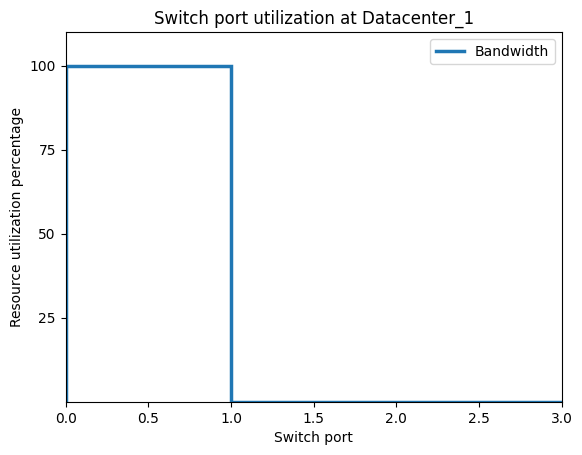

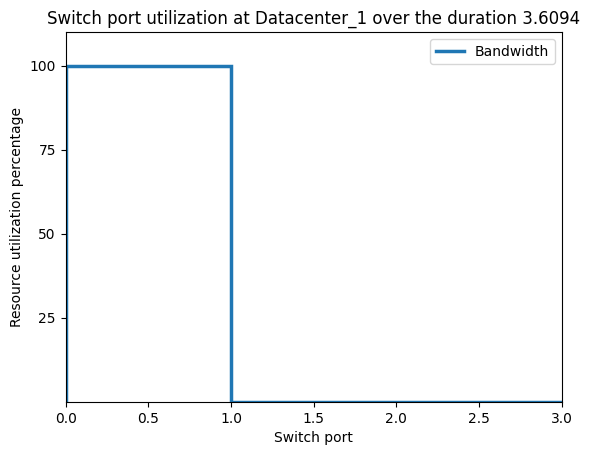

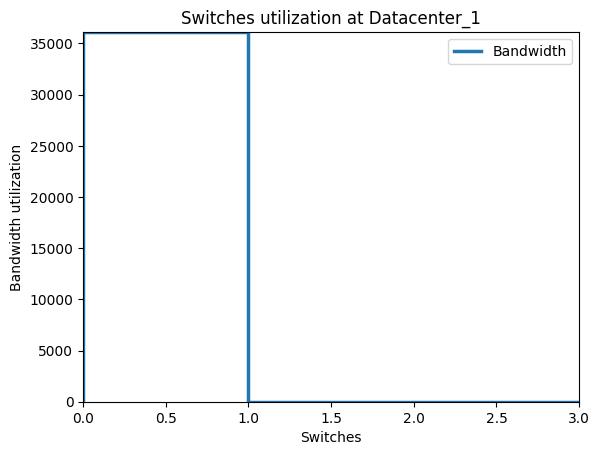

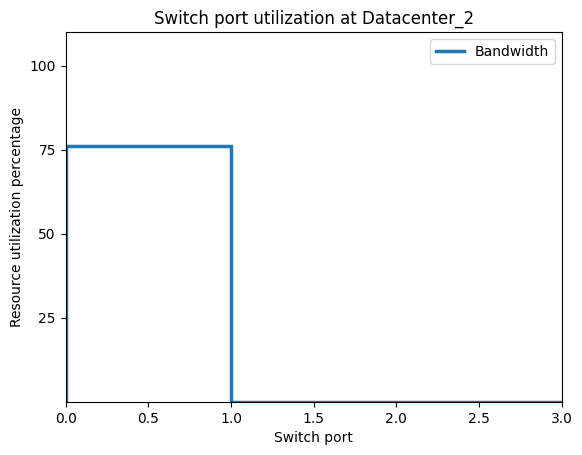

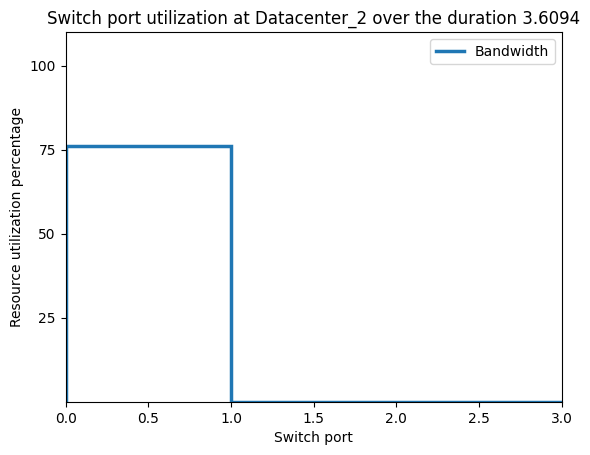

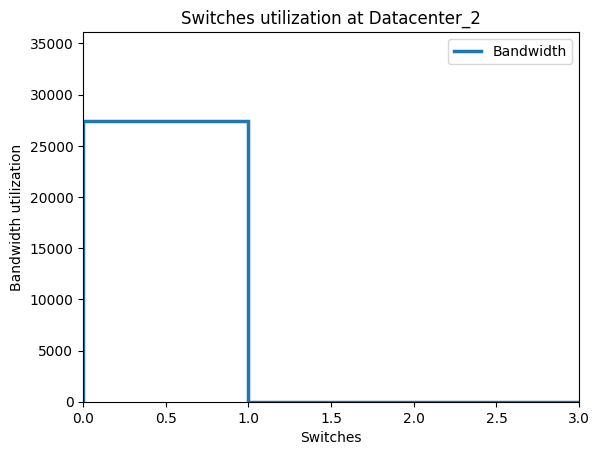

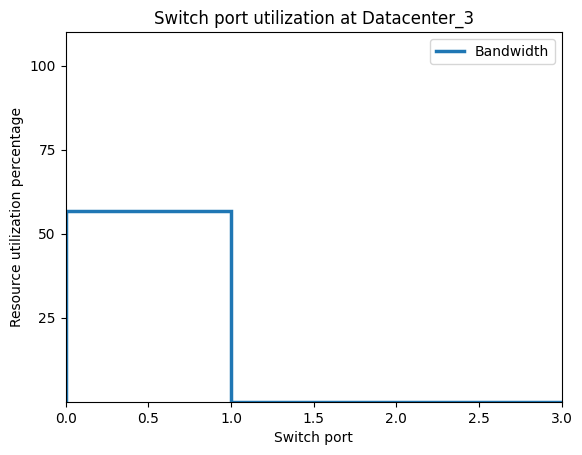

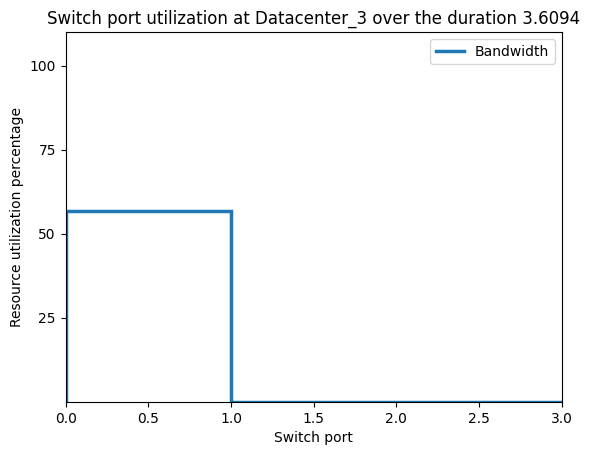

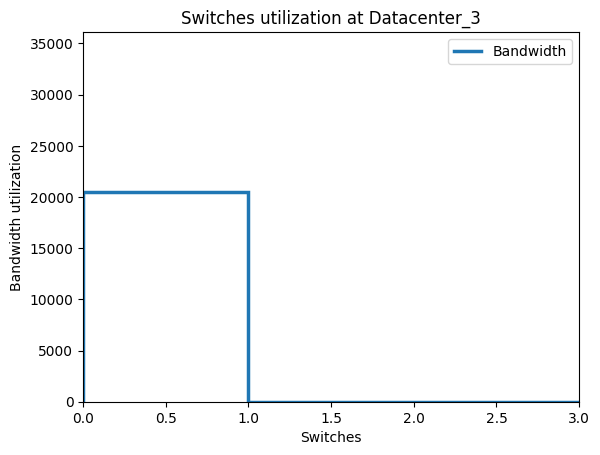

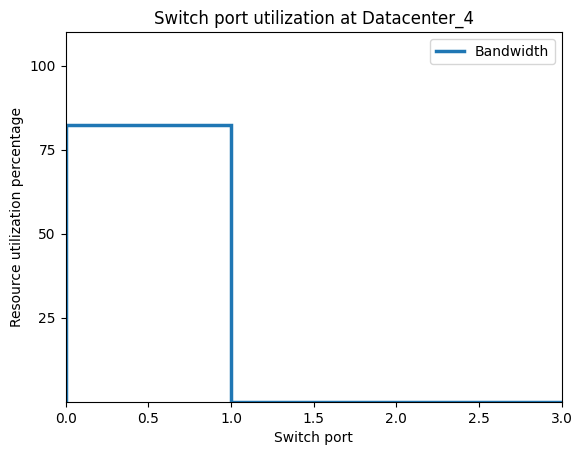

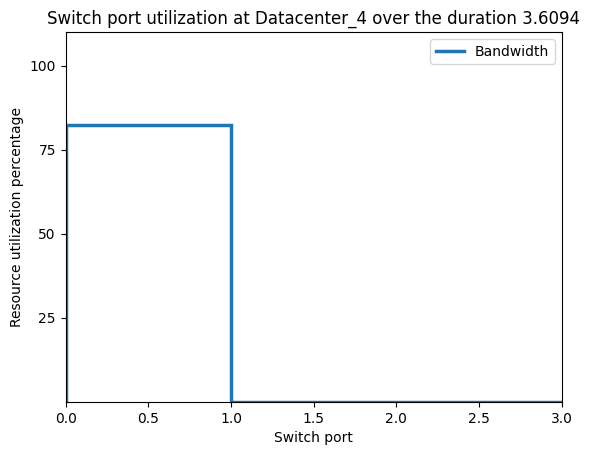

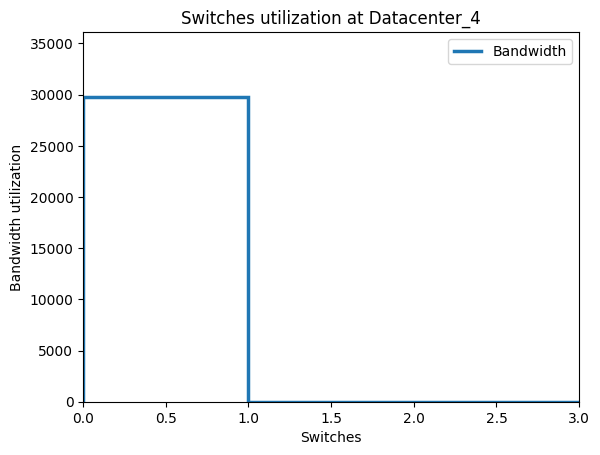

In [7]:
labels = np.unique(dataset['datacenter_name'])
max_switch_port_bandwidth_utilization = 0
for index, sample in dataset[dataset['role'] == "core switch"].iterrows():
    if pd.notna(sample['ports']):
        ports = sample['ports'].split(":") # ports: id, is_active, active_duration, switch_id, host_id, bandwidth, total_used_bandwidth
        for port in ports:
            if port != "":
                port_info = port.split(",")
                if max_switch_port_bandwidth_utilization < float(port_info[6]):
                    max_switch_port_bandwidth_utilization = float(port_info[6])

for i in range(len(labels)):
    switch_port_bandwidth_utilization = np.array([])
    # switch_active_duration = np.array([])
    # switch_inactive_duration = np.array([])
    for index, sample in dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['role'] == "core switch")].iterrows():
        
        if pd.notna(sample['ports']):
            ports = sample['ports'].split(":")
            for port in ports:
                if port != "":
                    port_info = port.split(",")
                    switch_port_bandwidth_utilization = np.append(switch_port_bandwidth_utilization, float(port_info[6]))
    
    fig, ax = plt.subplots()
    ax.stairs(((switch_port_bandwidth_utilization * dataset['duration'][0]) / (max_switch_port_bandwidth_utilization * dataset['duration'][0])) * 100, linewidth=2.5, label="Bandwidth")
    ax.set(xlim=(0, len(switch_port_bandwidth_utilization)), ylim=(0,110), yticks=np.array([25,50,75,100]))
    plt.ylabel("Resource utilization percentage")
    plt.xlabel("Switch port")
    plt.title(f"Switch port utilization at {sample['datacenter_name']}")
    plt.legend()
    plt.show()
    
    fig, ax = plt.subplots()
    ax.stairs((switch_port_bandwidth_utilization/max_switch_port_bandwidth_utilization)*100, linewidth=2.5, label="Bandwidth")
    ax.set(xlim=(0, len(switch_port_bandwidth_utilization)), ylim=(0,110), yticks=np.array([25,50,75,100]))
    plt.ylabel("Resource utilization percentage")
    plt.xlabel("Switch port")
    plt.title(f"Switch port utilization at {sample['datacenter_name']} over the duration {dataset['duration'][0]}")
    plt.legend()
    plt.show()
    
    fig, ax = plt.subplots()
    ax.stairs(switch_port_bandwidth_utilization, linewidth=2.5, label="Bandwidth")
    ax.set(xlim=(0, len(switch_port_bandwidth_utilization)), ylim=(0,max_switch_port_bandwidth_utilization + 10))
    plt.ylabel("Bandwidth utilization")
    plt.xlabel("Switches")
    plt.title(f"Switches utilization at {sample['datacenter_name']}")
    plt.legend()
    plt.show()

[36094. 27462. 20534. 29772.]
[36094. 27462. 20534. 29772.]


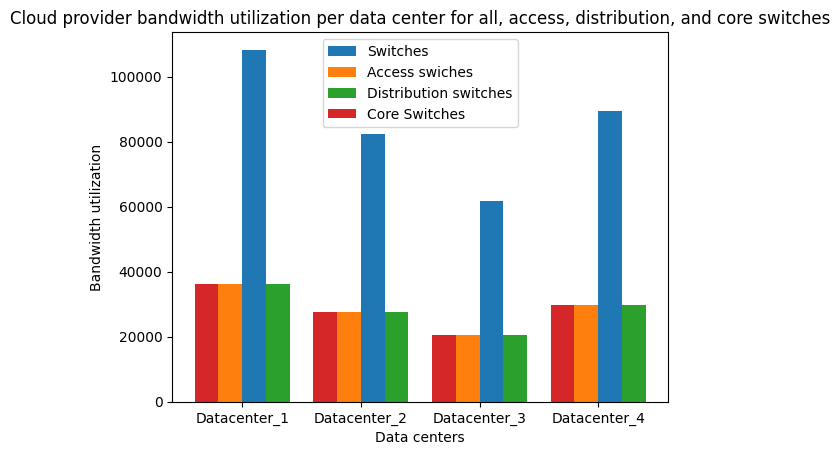

In [8]:
datacenter_bandwidth_utilization = np.array([])
datacenter_access_bandwidth_utilization = np.array([])
datacenter_distribution_bandwidth_utilization = np.array([])
datacenter_core_bandwidth_utilization = np.array([])
for i in range(len(labels)):
    switch_bandwidth_utilization = np.array([])
    for index, sample in dataset[dataset['datacenter_name'] == labels[i]].iterrows():
        switch_bandwidth_utilization = np.append(switch_bandwidth_utilization, sample['total_used_bandwidth'])
    datacenter_bandwidth_utilization = np.append(datacenter_bandwidth_utilization, np.sum(switch_bandwidth_utilization))
    
    switch_bandwidth_utilization = np.array([])
    for index, sample in dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['role'] == "access switch")].iterrows():
        switch_bandwidth_utilization = np.append(switch_bandwidth_utilization, sample['total_used_bandwidth'])
    datacenter_access_bandwidth_utilization = np.append(datacenter_access_bandwidth_utilization, np.sum(switch_bandwidth_utilization))
    
    switch_bandwidth_utilization = np.array([])
    for index, sample in dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['role'] == "distribution switch")].iterrows():
        switch_bandwidth_utilization = np.append(switch_bandwidth_utilization, sample['total_used_bandwidth'])
    datacenter_distribution_bandwidth_utilization = np.append(datacenter_distribution_bandwidth_utilization, np.sum(switch_bandwidth_utilization))
    
    switch_bandwidth_utilization = np.array([])
    for index, sample in dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['role'] == "core switch")].iterrows():
        switch_bandwidth_utilization = np.append(switch_bandwidth_utilization, sample['total_used_bandwidth'])
    datacenter_core_bandwidth_utilization = np.append(datacenter_core_bandwidth_utilization, np.sum(switch_bandwidth_utilization))

bar_width = 0.2
x = np.arange(len(labels))
plt.bar(x + bar_width/2, datacenter_bandwidth_utilization, bar_width, label="Switches")
plt.bar(x - bar_width/2, datacenter_access_bandwidth_utilization, bar_width, label="Access swiches")
plt.bar(x + bar_width+bar_width/2, datacenter_distribution_bandwidth_utilization, bar_width, label="Distribution switches")
plt.bar(x - bar_width-bar_width/2, datacenter_core_bandwidth_utilization, bar_width, label="Core Switches")
plt.xlabel("Data centers")
plt.xticks(np.arange(len(labels)), labels)
plt.ylabel("Bandwidth utilization")
plt.title("Cloud provider bandwidth utilization per data center for all, access, distribution, and core switches")
plt.legend()
plt.show()

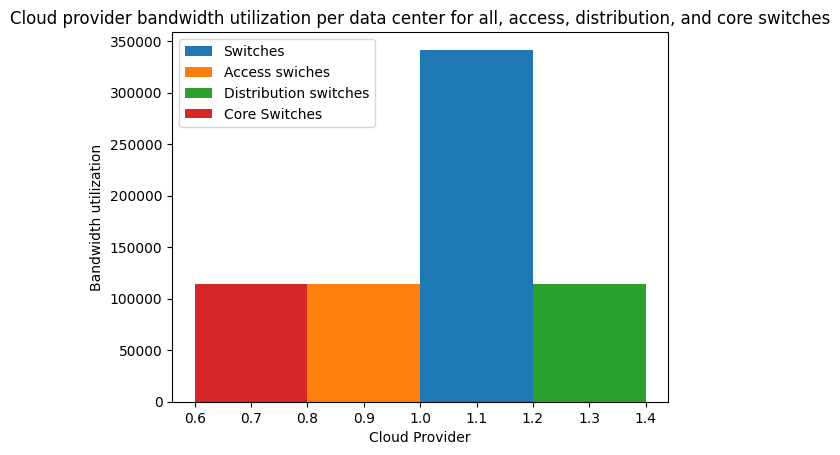

In [9]:
plt.bar(1 + bar_width/2, np.sum(datacenter_bandwidth_utilization), bar_width, label="Switches")
plt.bar(1 - bar_width/2, np.sum(datacenter_access_bandwidth_utilization), bar_width, label="Access swiches")
plt.bar(1 + bar_width+bar_width/2, np.sum(datacenter_distribution_bandwidth_utilization), bar_width, label="Distribution switches")
plt.bar(1 - bar_width-bar_width/2, np.sum(datacenter_core_bandwidth_utilization), bar_width, label="Core Switches")
plt.xlabel("Cloud Provider")
plt.ylabel("Bandwidth utilization")
plt.title("Cloud provider bandwidth utilization per data center for all, access, distribution, and core switches")
plt.legend()
plt.show()